In [4]:
!nvidia-smi

Sat Aug 17 11:46:58 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8              12W /  70W |      3MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [6]:
import os
HOME=os.getcwd()
print(HOME)

/content


# Installing Ultralytics

In [2]:
!pip install ultralytics
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 33.6/78.2 GB disk)


In [3]:
from ultralytics import YOLO

from IPython.display import display,Image

#  Custom Training - loading my own annotated dataset by connecting to google drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
%cd /content/drive/MyDrive/YOLO-V8

/content/drive/MyDrive/YOLO-V8


In [15]:
!ls


data  data.yaml  Yolov8-object-detection.ipynb


# Training the custom model

In [16]:
%cd /content/drive/MyDrive/YOLO-V8

!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=224 plots=True

/content/drive/MyDrive/YOLO-V8
100% 21.5M/21.5M [00:00<00:00, 37.3MB/s]
Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, s

In [18]:
!ls runs/detect/train/


args.yaml					     P_curve.png	 train_batch121.jpg
confusion_matrix_normalized.png			     PR_curve.png	 train_batch122.jpg
confusion_matrix.png				     R_curve.png	 train_batch1.jpg
events.out.tfevents.1723897127.f2bae1f8ec7d.11858.0  results.csv	 train_batch2.jpg
F1_curve.png					     results.png	 val_batch0_labels.jpg
labels_correlogram.jpg				     train_batch0.jpg	 val_batch0_pred.jpg
labels.jpg					     train_batch120.jpg  weights


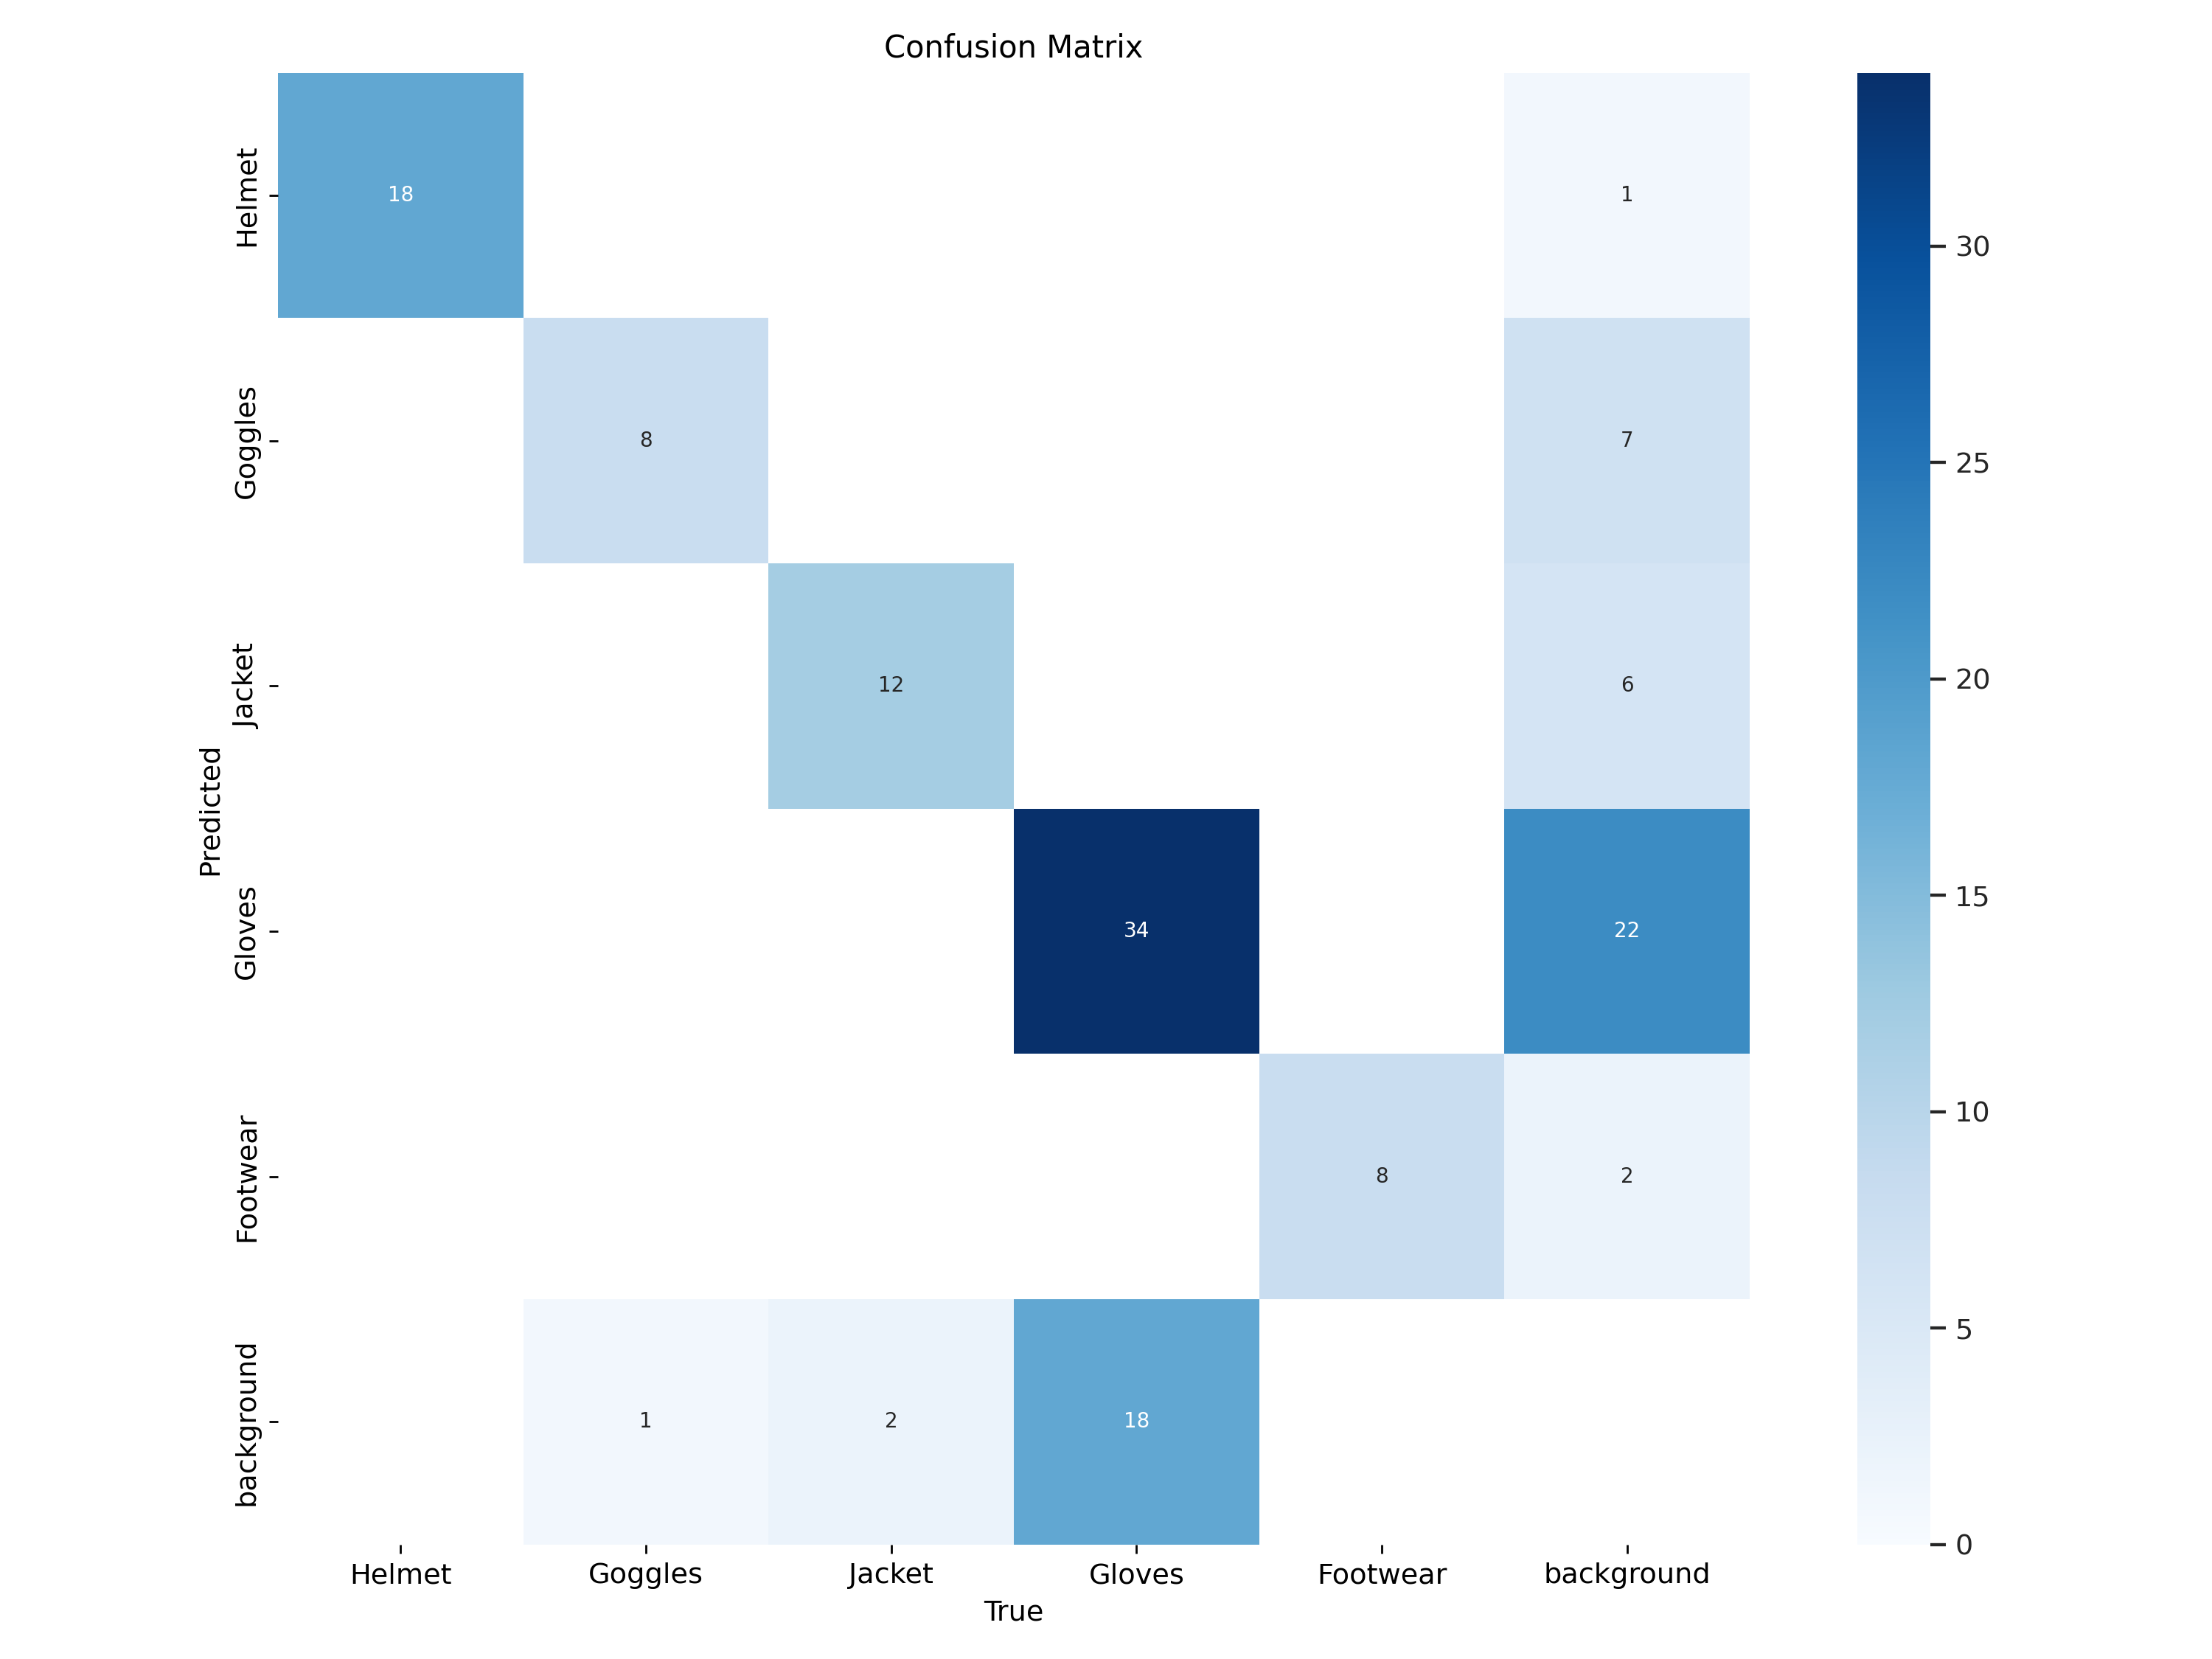

In [19]:
Image(filename='runs/detect/train/confusion_matrix.png',width=600)

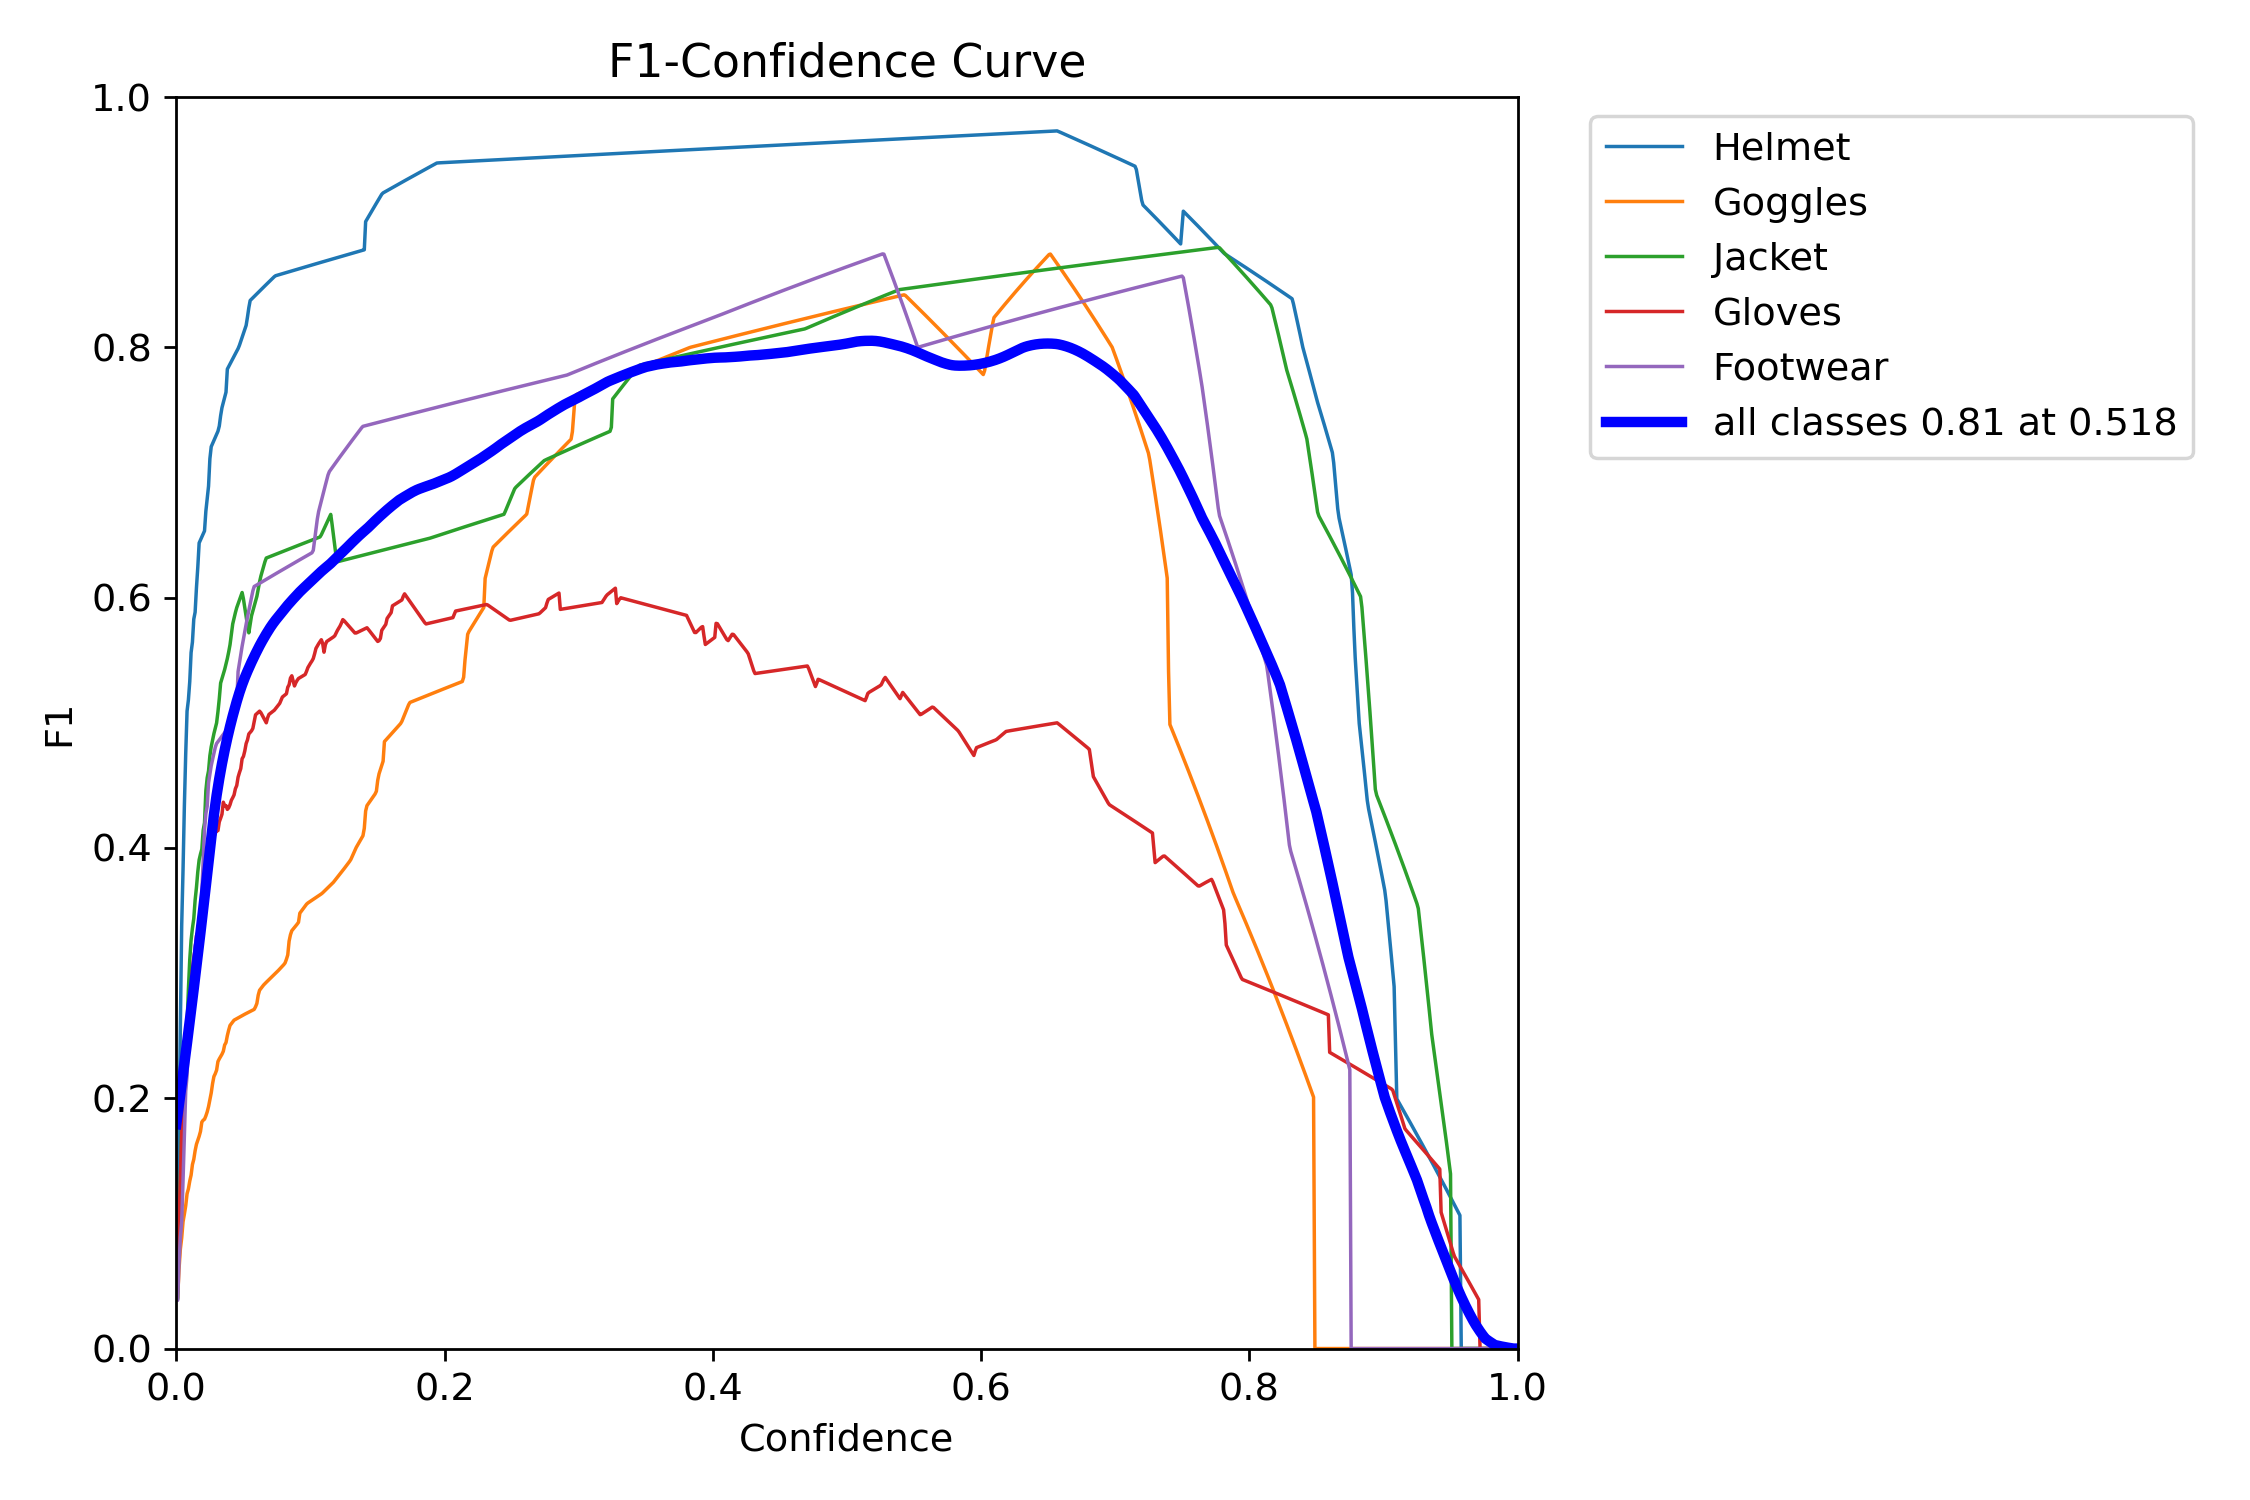

In [24]:
Image(filename='runs/detect/train/F1_curve.png',width=600)

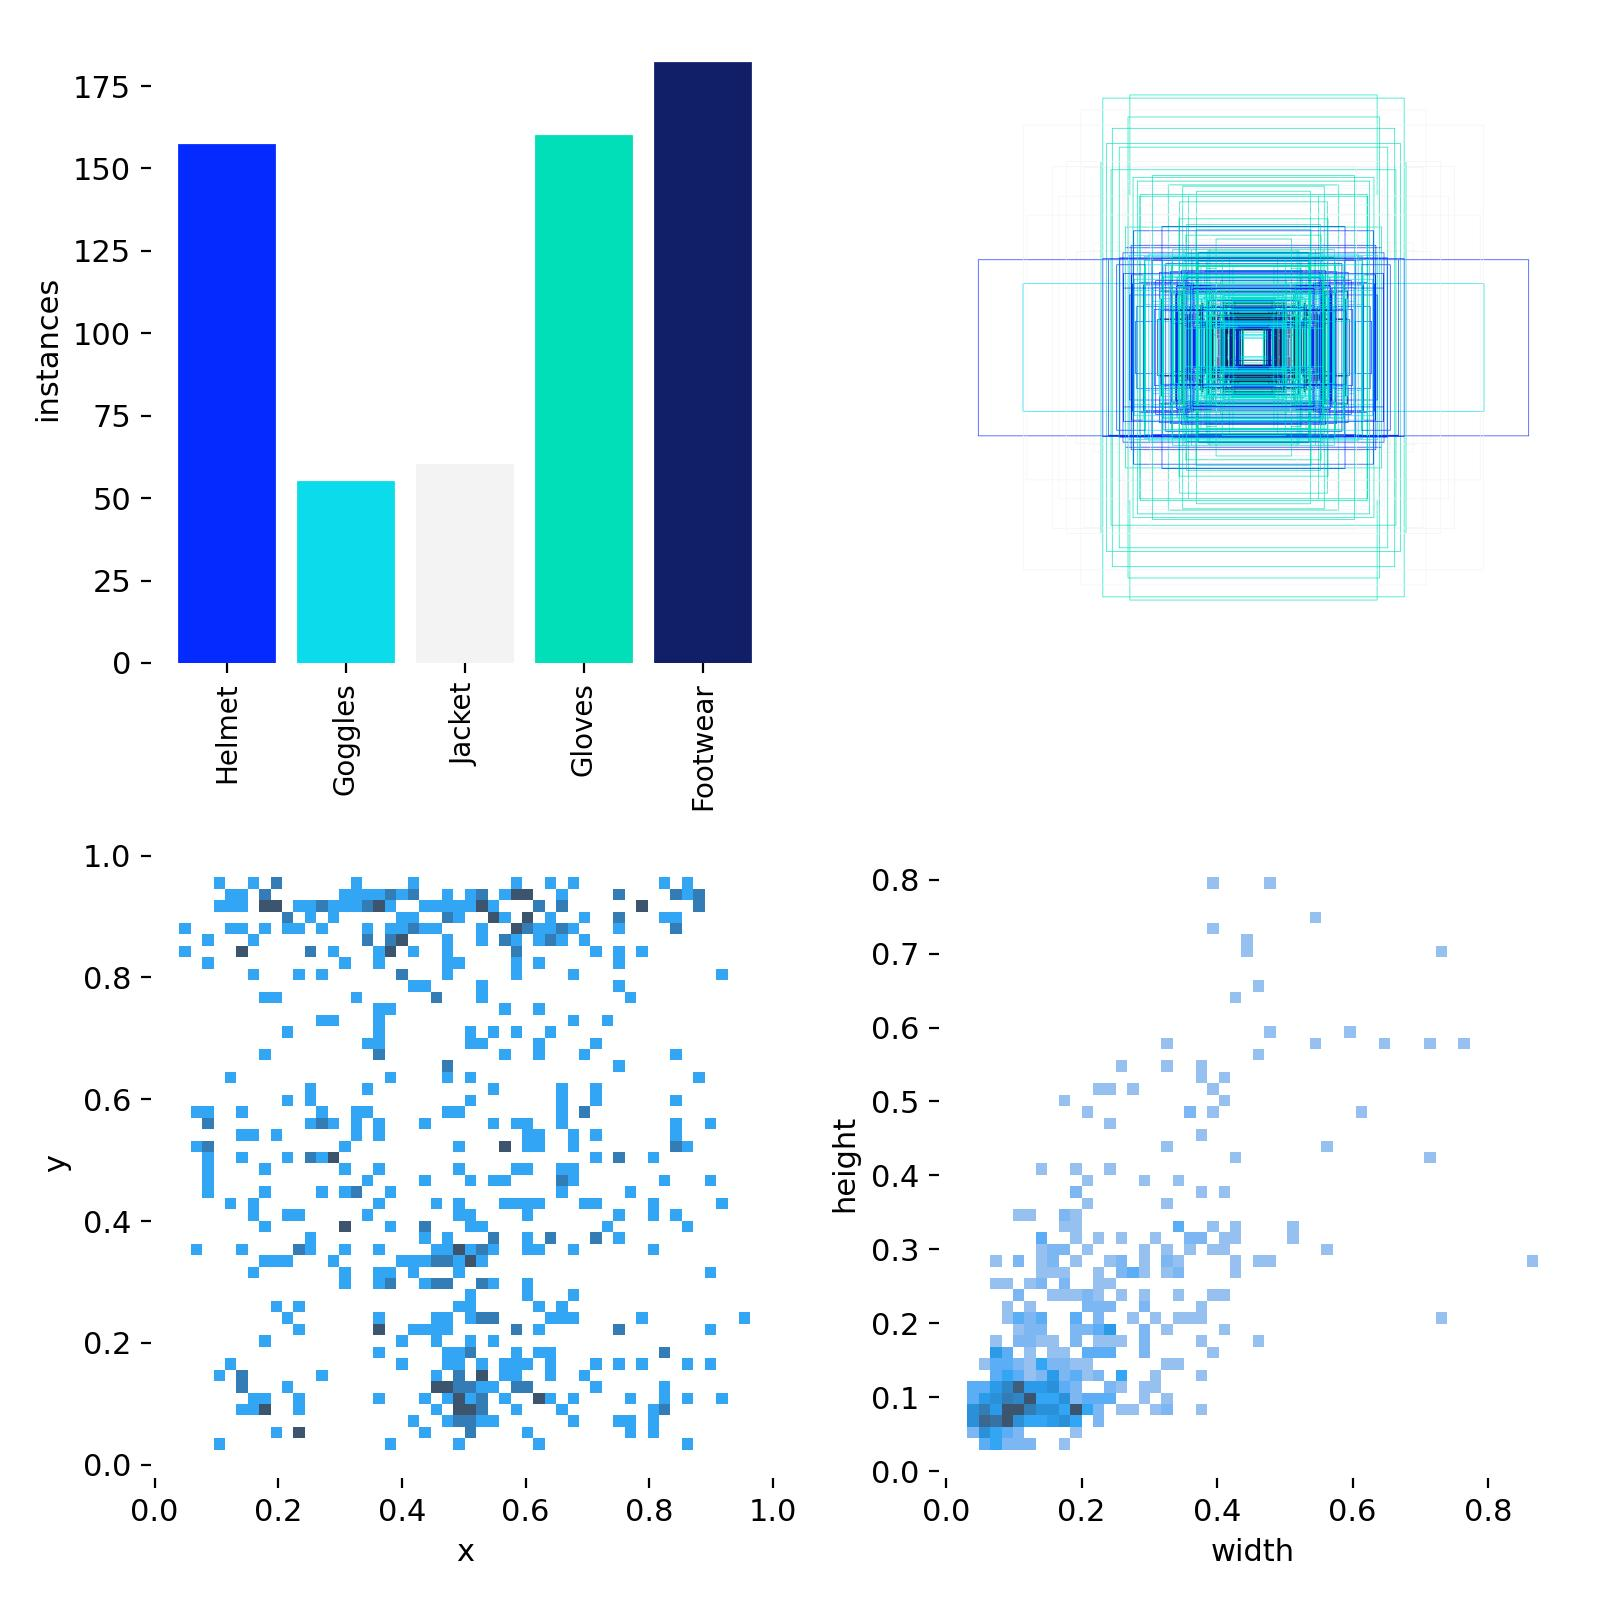

In [25]:
Image(filename='runs/detect/train/labels.jpg',width=600)

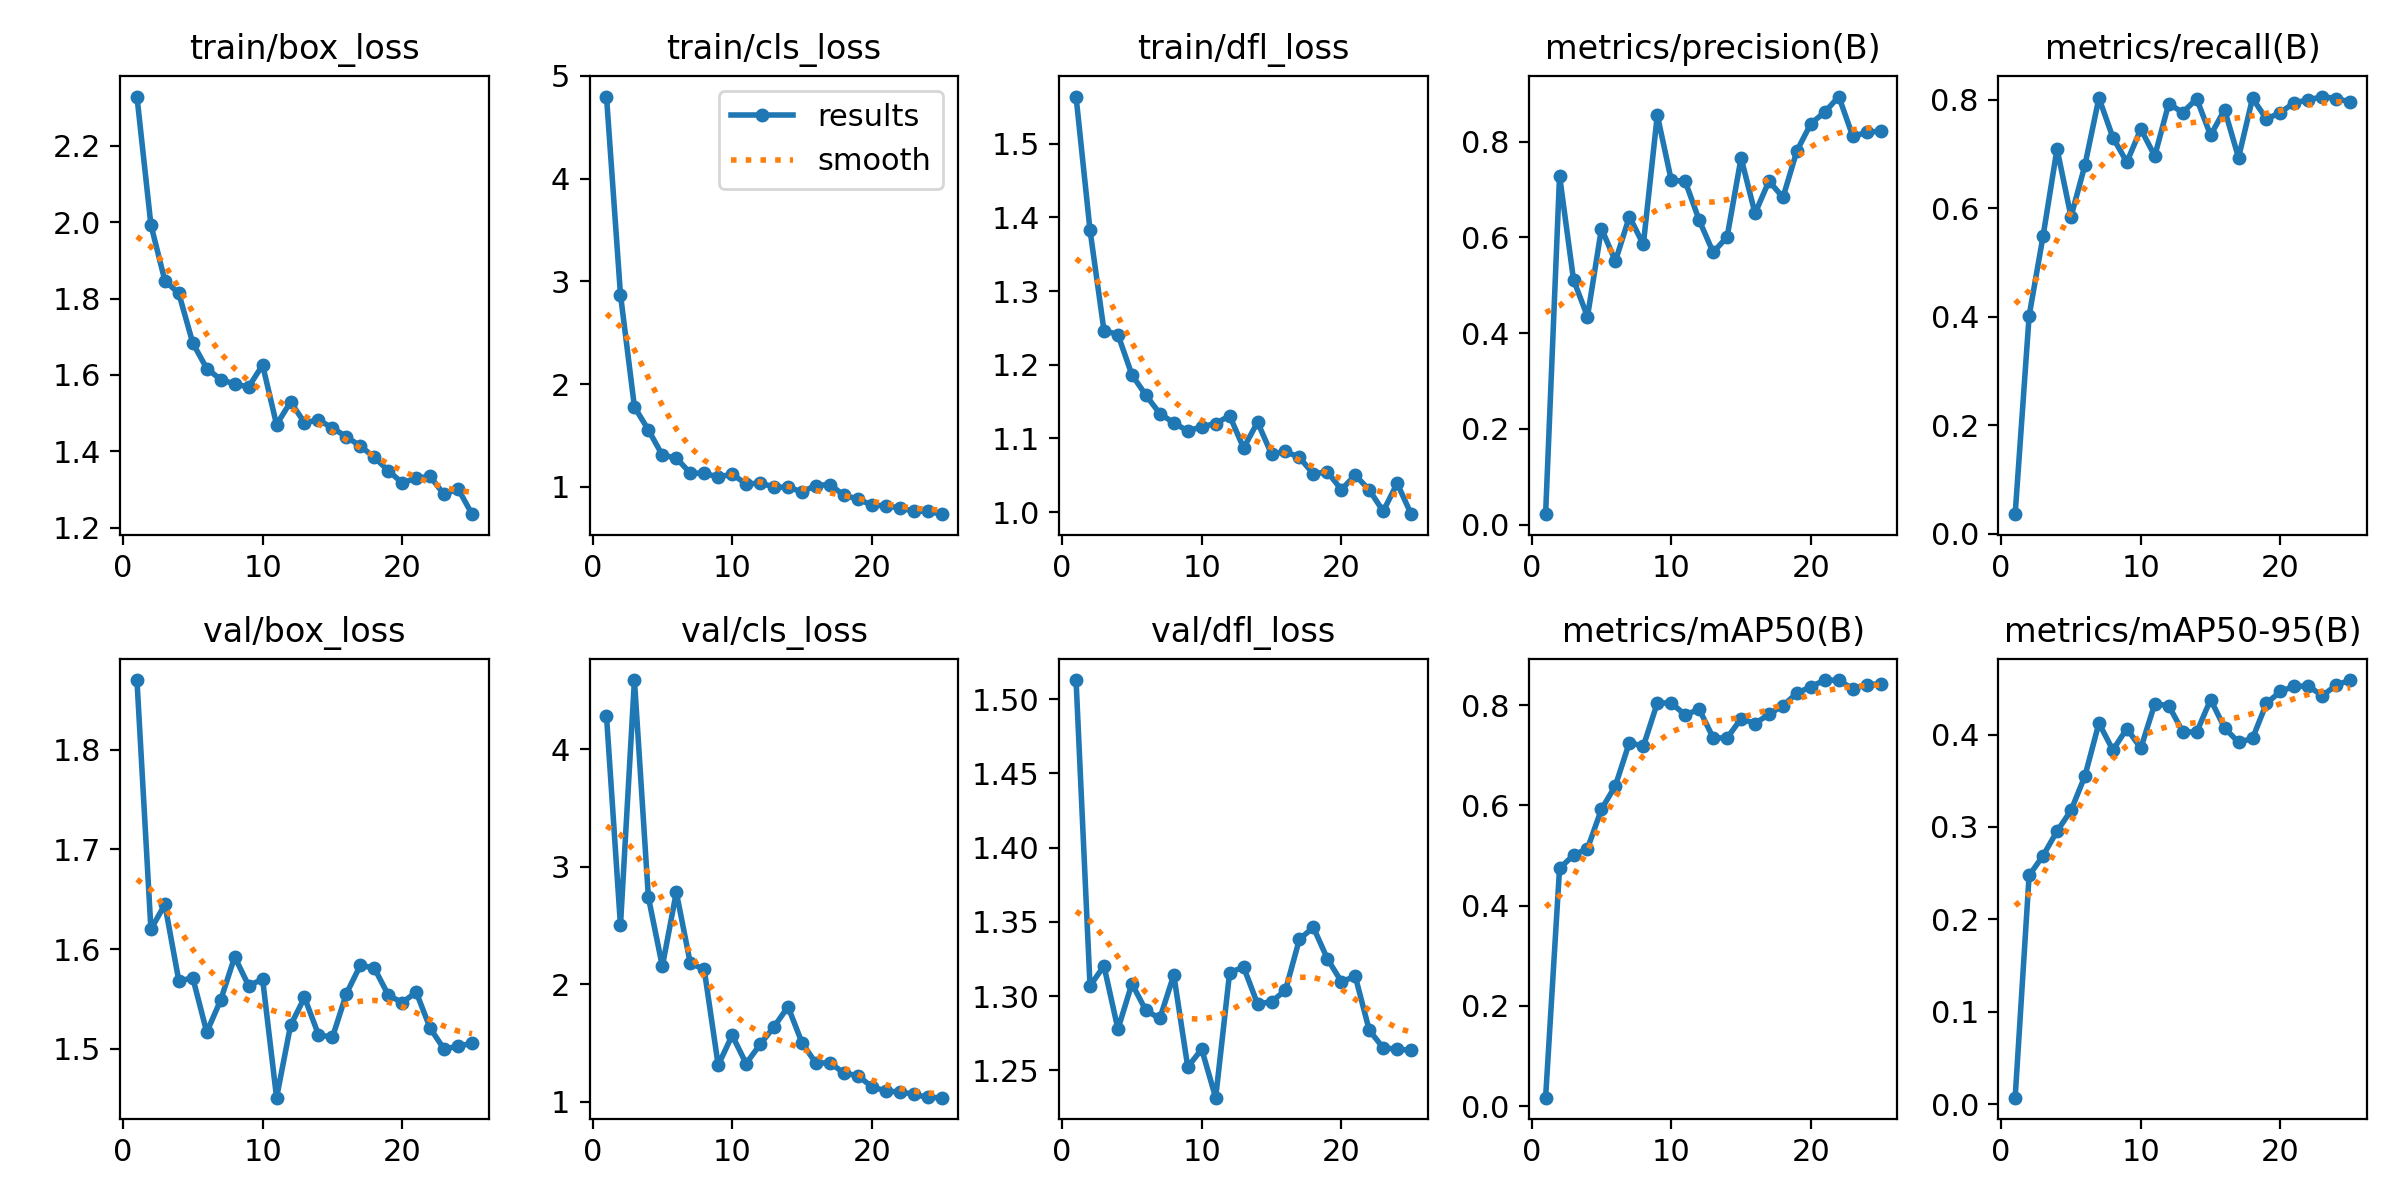

In [20]:
Image(filename='runs/detect/train/results.png',width=600)

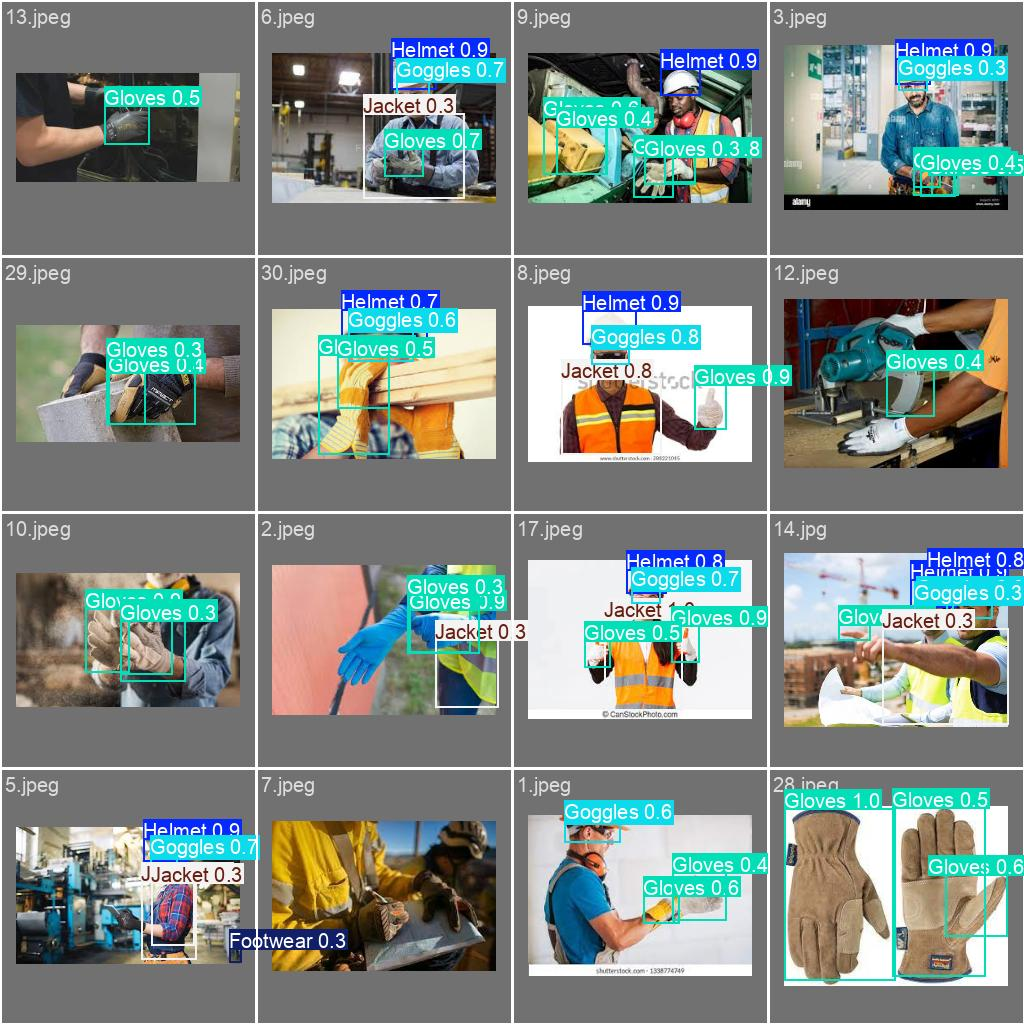

In [21]:
Image(filename='runs/detect/train/val_batch0_pred.jpg',width=600)

# Validate Custom Model

In [22]:
!yolo task=detect mode=val model=runs/detect/train/weights/best.pt data= data.yaml

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/drive/MyDrive/YOLO-V8/data/data/valid/labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100% 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.08it/s]
                   all         31        101       0.82      0.798      0.846      0.461
                Helmet         17         18      0.934          1      0.995      0.694
               Goggles          9          9      0.784      0.889      0.874      0.326
                Jacket         13         14      0.857      0.786      0.849       0.61
                Gloves         30         52       0.67      0.442      0.648      0.341
              Footwear          4          8      0.857      0.875      0.865      0.333
Speed: 0.7ms preprocess, 30.7m

# Inference with custom model

In [23]:
!yolo task=detect mode=predict model=runs/detect/train/weights/best.pt conf=0.25 source=data/data/test/images

Ultralytics YOLOv8.2.78 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11,127,519 parameters, 0 gradients, 28.4 GFLOPs

image 1/31 /content/drive/MyDrive/YOLO-V8/data/data/test/images/1.jpeg: 192x224 1 Goggles, 3 Glovess, 71.5ms
image 2/31 /content/drive/MyDrive/YOLO-V8/data/data/test/images/10.jpeg: 160x224 2 Glovess, 69.9ms
image 3/31 /content/drive/MyDrive/YOLO-V8/data/data/test/images/11.jpeg: 224x224 2 Glovess, 8.1ms
image 4/31 /content/drive/MyDrive/YOLO-V8/data/data/test/images/12.jpeg: 192x224 1 Gloves, 8.3ms
image 5/31 /content/drive/MyDrive/YOLO-V8/data/data/test/images/13.jpeg: 128x224 1 Gloves, 74.1ms
image 6/31 /content/drive/MyDrive/YOLO-V8/data/data/test/images/14(1).jpeg: 224x224 (no detections), 8.4ms
image 7/31 /content/drive/MyDrive/YOLO-V8/data/data/test/images/14.jpg: 192x224 2 Helmets, 1 Goggles, 1 Jacket, 1 Gloves, 8.5ms
image 8/31 /content/drive/MyDrive/YOLO-V8/data/data/test/images/15.jpeg: 224x224 1 Jacket, 2 